In [1]:
#This is the works for Udacity Self-driving-car-nd Term1 Project 3.
%matplotlib inline
import os, sys, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset

In [2]:
Folder_path = "/home/jaeoh2/Tools/linux_sim/train_data/"
Img_path = Folder_path + "IMG/"
df = pd.read_csv(Folder_path + "driving_log.csv", names=['center', 'left', 'right', 'steer', 'gas', 'brake', 'speed'])


In [3]:
df

,center,left,right,steer,gas,brake,speed
0,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.182353,1,0,30.06925
1,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.205882,1,0,30.18475
2,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.223529,1,0,30.18512
3,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.223529,1,0,30.18708
4,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.223529,1,0,30.18811
5,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.117647,1,0,30.19190
6,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.017647,1,0,30.18985
7,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.017647,1,0,30.19038
8,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.017647,1,0,30.19047
9,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ce...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/le...,/home/jaeoh2/Tools/linux_sim/train_data/IMG/ri...,-0.017647,1,0,30.19038


In [4]:
num_examples = len(df)
print("Number of examplese : {}".format(num_examples))

Number of examplese : 50243


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c34fa41d0>]], dtype=object)

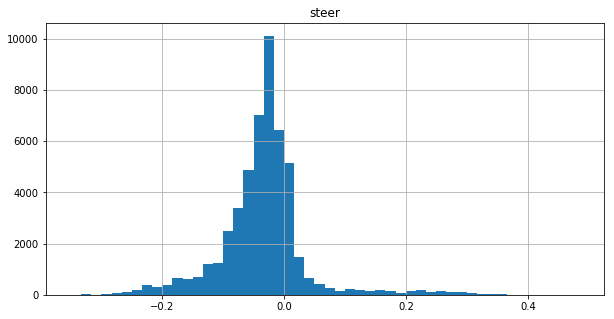

In [5]:
# Dataset distribution plot
df.hist(column=['steer'], bins=50, figsize=(10,5))

### Data Augmentation

In [6]:
import random
import os, sys
import csv
from skimage.transform import rotate, warp, ProjectiveTransform, AffineTransform
from skimage.exposure import equalize_adapthist
#from scipy.misc import imresize
import cv2

In [7]:
def random_translate(X, steer, intensity=1):
    delta = 15.* intensity
    rand_delta = random.uniform(-delta, delta)
    translate_matrix = AffineTransform(translation=(0, rand_delta))
    X = warp(X,translate_matrix)
    steer = steer
    return X, steer

In [8]:
df.center[0]

'/home/jaeoh2/Tools/linux_sim/train_data/IMG/center_2017_09_28_01_27_52_176.jpg'

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4bddf6cb10>,
 (-0.5, 319.5, 159.5, -0.5))

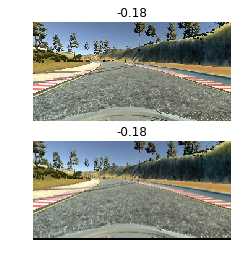

In [9]:
#test
test_img = plt.imread(df.center[0])
test_str = float(df.steer[0])
test_rt_img, test_rt_str = random_translate(test_img, test_str)
plt.subplot(2,1,1), plt.imshow(test_img), plt.title(round(test_str,2)), plt.axis('off')
plt.subplot(2,1,2), plt.imshow(test_rt_img), plt.title(round(test_rt_str,2)), plt.axis('off')

In [10]:
def image_flip(X, steer):
    img_fliped = np.fliplr(X)
    str_fliped = -steer
    return img_fliped, str_fliped

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4bddeb0690>,
 (-0.5, 319.5, 159.5, -0.5),
 <matplotlib.text.Text at 0x7f4bdc52df10>)

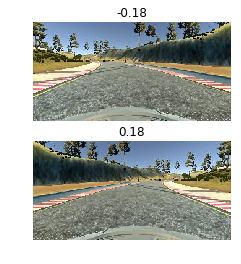

In [11]:
#test
test_fl_img, test_fl_str = image_flip(test_img, test_str)
plt.subplot(2,1,1), plt.imshow(test_img), plt.axis('off'), plt.title(round(test_str,2))
plt.subplot(2,1,2), plt.imshow(test_fl_img), plt.axis('off'), plt.title(round(test_fl_str,2))

In [12]:
def transform_images(X, y):
    X, y = random_translate(X, y)
    X, y = image_flip(X, y)
    
    return X, y    

In [13]:
def get_transform_images(Xs, ys, n_each=10):
    X_arr = []
    y_arr = []
    
    for i, (x, y) in enumerate(zip(Xs, ys)):
        for _ in range(n_each):
            img_trf, label_trf = transform_images(x, y)
            X_arr.append(img_trf)
            y_arr.append(label_trf)
            
        print_progress(i+1, Xs.shape[0])
    
    X_arr = np.asarray(X_arr, dtype=np.uint8)
    y_arr = np.asarray(y_arr, dtype=np.float32)
    
    return X_arr, y_arr

In [14]:
import math
import cv2
def preprocess_image(X):
    shape = X.shape
    X = X[(shape[0]/4):shape[0]-25, 0:shape[1]]
    X = cv2.resize(X, (64,64), interpolation=cv2.INTER_AREA)
    
    return X

In [15]:
#data balancing refer from https://navoshta.com/end-to-end-deep-learning/
balanced = pd.DataFrame()
bins = 1000
bin_n = 200

start = 0
for end in np.linspace(0, 1, num=bins):
    df_range = df[(np.absolute(df.steer) >= start) & (np.absolute(df.steer) < end)]
    range_n = min(bin_n, df_range.shape[0])
    if range_n > 0:
        balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end
balanced.to_csv(Folder_path + 'driving_log_balanced.csv', index=False)

In [16]:
samples = []
with open(Folder_path + "driving_log_balanced.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

In [18]:
def generator(df, batch_size=128):
    num_samples = len(df)
    while True:
        #shuffle(samples)
        for offset in range(1, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            
            images = []
            angles = []
            
            for batch_sample in batch_samples:
                i_lrc = np.random.randint(3)
                if(i_lrc == 0): #left
                    path_file = batch_sample[1]
                    str_offset = 0.25
                if(i_lrc == 1): #center
                    path_file = batch_sample[0]
                    str_offset = 0.
                if(i_lrc == 2): #right
                    path_file = batch_sample[2]
                    str_offset = -0.25
                
                img = cv2.imread(path_file)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                #img = plt.imread(path_file)
                ang = float(batch_sample[3]) + str_offset
                img, ang = random_translate(img, ang)
                if np.random.randint(2) == 0:
                    img, ang = image_flip(img, ang)
                
                img = preprocess_image(img)
                
                images.append(img)
                angles.append(ang)
                
                
            X_train = np.array(images)
            y_train = np.array(angles)
            
            yield shuffle(X_train, y_train)
                

In [19]:
batch_size = 128
train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)

In [20]:
#test
for i in range(100):
    next(train_generator)
img,steer = next(train_generator)

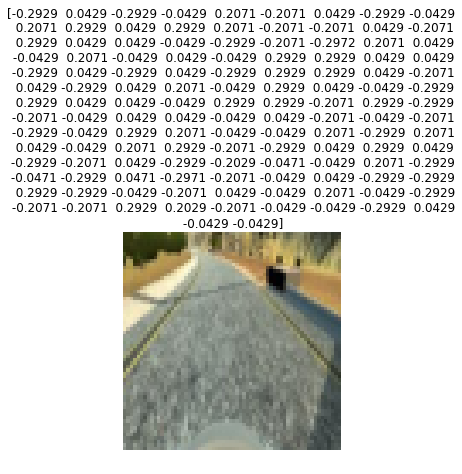

In [21]:
plt.imshow(img[3]);
plt.axis('off')
plt.title(str(np.round(steer,4)));

### Model

In [22]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPool2D
from keras.layers import Dense, Dropout, Flatten, Cropping2D
from keras.optimizers import adam

Using TensorFlow backend.


In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
from keras.layers import Lambda

In [24]:
#Model Configurations
img_height = 64
img_width = 64
img_ch = 3

f_size = 3
learning_rate = 1e-2
activation = 'elu'

In [25]:
def build_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/255. -0.5, input_shape=(img_height, img_width, img_ch)))
    model.add(Conv2D(16,(3,3), activation=activation, padding='valid'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(32,(3,3), activation=activation, padding='valid'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3), activation=activation, padding='valid'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation=activation))
    model.add(Dropout(0.25))
    model.add(Dense(20, activation=activation))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    
    model.summary()
    #model = make_parallel(model,2)
    model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
    
    return model


In [ ]:
model = build_model()
model_checkpoint = ModelCheckpoint('model.h5', monitor='loss', save_best_only=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [ ]:
model.fit_generator(train_generator,
                    steps_per_epoch=len(train_samples),
                    validation_data=validation_generator,
                    validation_steps=len(validation_samples),
                    callbacks=[model_checkpoint],
                    epochs=3)

Epoch 1/3
1020/9501 [==>...........................] - ETA: 6958s - loss: 0.0701 - acc: 0.0069     

In [ ]:
with open('model.json'), 'w') as file:
        file.write(model.to_json())

### Results